# Courbe d’intensité

Exemple simple : Courbes d’intensités lumineuse au limbe à partir d'images d’un coronographe

In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
from module import readFitsBz2

path = 'data/C1/imoa_06563_c1_20240313_09472619_bri1.fts.bz2'

data = readFitsBz2(path)

c:\Users\lherrington\anaconda3\envs\climso\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
circles = []
stepSize = 1*math.pi/360
for r in [800, 810, 820]:
    positions = []
    t = 0
    while t < 2 * math.pi:
        positions.append((round(r * math.cos(t) + data.shape[0]/2,), round(r * math.sin(t) + data.shape[0]/2)))
        t += stepSize
    circles.append(positions)

In [4]:
coord_x = []
coord_y = []
for idx in range(3):
    coord_x.append([x for x,y in circles[idx]])
    coord_y.append([y for x,y in circles[idx]])

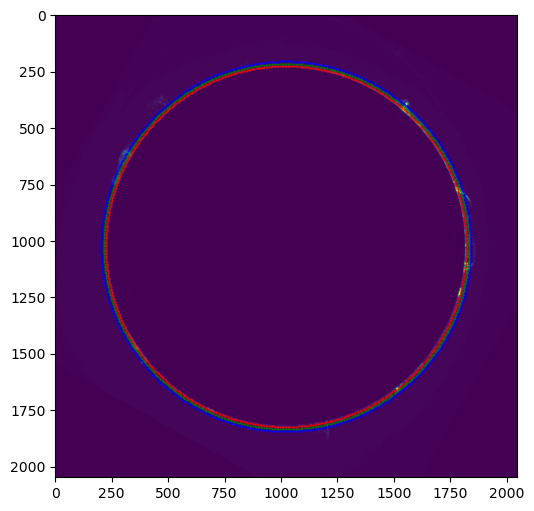

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(data)
plt.scatter(coord_x[0], coord_y[0], marker='.', s=1, c='r');
plt.scatter(coord_x[1], coord_y[1], marker='.', s=1, c='g');
plt.scatter(coord_x[2], coord_y[2], marker='.', s=1, c='b');
 

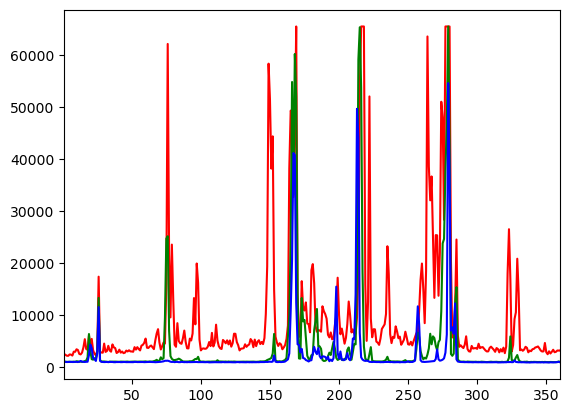

In [6]:
curves = []
for circle in circles:
    intensity = []
    for coord in circle:
        intensity.append(data[coord])
    curves.append(intensity)

plt.figure
plt.plot(curves[0],'r');
plt.plot(curves[1],'g');
plt.plot(curves[2],'b');
plt.xlim(1,360);

- degré 0 ?
- précision ?
- conversion rayon pixels -> m ?